In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import requests
from io import BytesIO

url = 'https://mymodernmet.com/wp/wp-content/uploads/2017/08/monovision-awards-bw-series-of-the-year-2017-02.jpg'

response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('L')
print(np.array(img).shape)
np.array(img)

from sklearn.datasets import fetch_openml
digits = fetch_openml('mnist_784')
#digits.data.shape

images = digits.data.reshape(-1, 28, 28)

from sklearn.decomposition import PCA

pca = PCA(n_components=50)

X_transformed = pca.fit_transform(digits.data.astype(float))
X_transformed.shape

proj = np.dot(digits.data.astype(float) - pca.mean_, pca.components_.T)
proj.shape

X_restored = pca.inverse_transform(X_transformed)
X_restored.shape

%matplotlib inline

(500, 750)


Задача 1

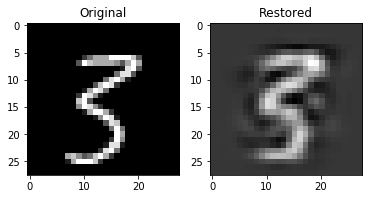

In [6]:
res = np.dot(X_transformed, pca.components_) + pca.mean_

i = 540
fig, ax = plt.subplots(1, 2)
ax[0].imshow(images[i], cmap='gray')
ax[1].imshow(res[i].reshape(28, 28), cmap='gray')
ax[0].set_title('Original')
ax[1].set_title('Restored')
plt.show()

Задача 2

In [14]:
pca = PCA()
X_transformed = pca.fit_transform(digits.data.astype(float)) 
var = pca.explained_variance_ratio_.cumsum().round(2) 
v99 = int(round(np.mean(np.where(var == 0.99))))
v95 = int(round(np.mean(np.where(var == 0.95))))
v90 = int(round(np.mean(np.where(var == 0.9))))
v85 = int(round(np.mean(np.where(var == 0.85))))
print(v99,v95,v90,v85)

338 153 86 58


Задача 3

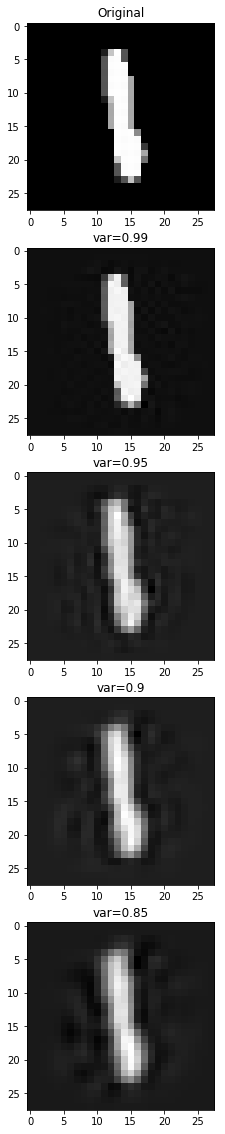

In [18]:
p99 = PCA(v99)
t99 = p99.fit_transform(digits.data.astype(float))
r99 = p99.inverse_transform(t99)
p95 = PCA(v95)
t95 = p95.fit_transform(digits.data.astype(float))
r95 = p95.inverse_transform(t95)
p90 = PCA(v90)
t90 = p90.fit_transform(digits.data.astype(float))
r90 = p90.inverse_transform(t90)
p85 = PCA(v85)
t85 = p85.fit_transform(digits.data.astype(float))
r85 = p85.inverse_transform(t85)
i = 200
fig, ax = plt.subplots(5, 1, figsize=(10, 20))
ax[0].imshow(images[i], cmap="gray")
ax[1].imshow(r99[i].reshape(28, 28), cmap="gray")
ax[2].imshow(r95[i].reshape(28, 28), cmap="gray")
ax[3].imshow(r90[i].reshape(28, 28), cmap="gray")
ax[4].imshow(r85[i].reshape(28, 28), cmap="gray")
ax[0].set_title("Original")
ax[1].set_title("var=0.99")
ax[2].set_title("var=0.95")
ax[3].set_title("var=0.9")
ax[4].set_title("var=0.85")
plt.show()

Задача 4 ( не решена)

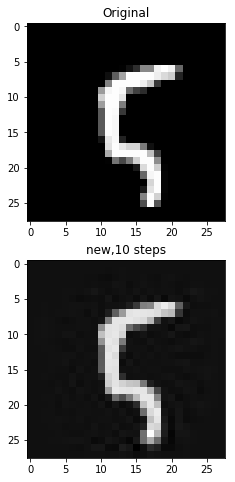

In [20]:
p99 = PCA(v99)
t99 = p99.fit_transform(digits.data.astype(float))
r99 = p99.inverse_transform(t99)
for i in range(10):
    t99 = p99.fit_transform(r99)
    r99 = p99.inverse_transform(t99)
i=100
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].imshow(images[i], cmap="gray")
ax[1].imshow(r99[i].reshape(28, 28), cmap="gray")
ax[0].set_title("Original")
ax[1].set_title("new,10 steps")
plt.show()